In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [11]:
# Converting to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [14]:

# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [15]:

# Checking for outliers
print("\nOutliers (if any):\n", df.describe())


Outliers (if any):
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

In [16]:
# Step 3: Outlier Detection and Removal
# Using IQR for all numeric columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Identify outliers (optional: removing rows with extreme values)
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nOutliers Detected Per Column:\n", outliers)


Outliers Detected Per Column:
 mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
target                      0
dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

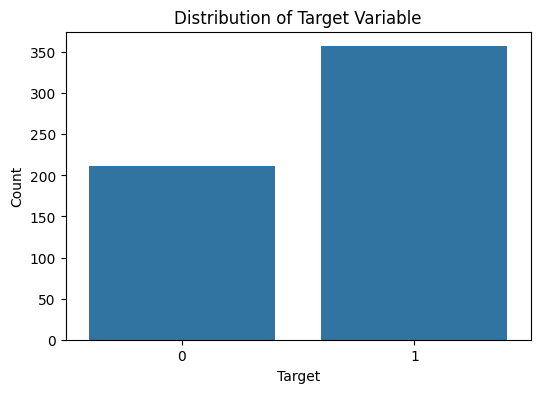

In [19]:
# Data Exploration

# Check the distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

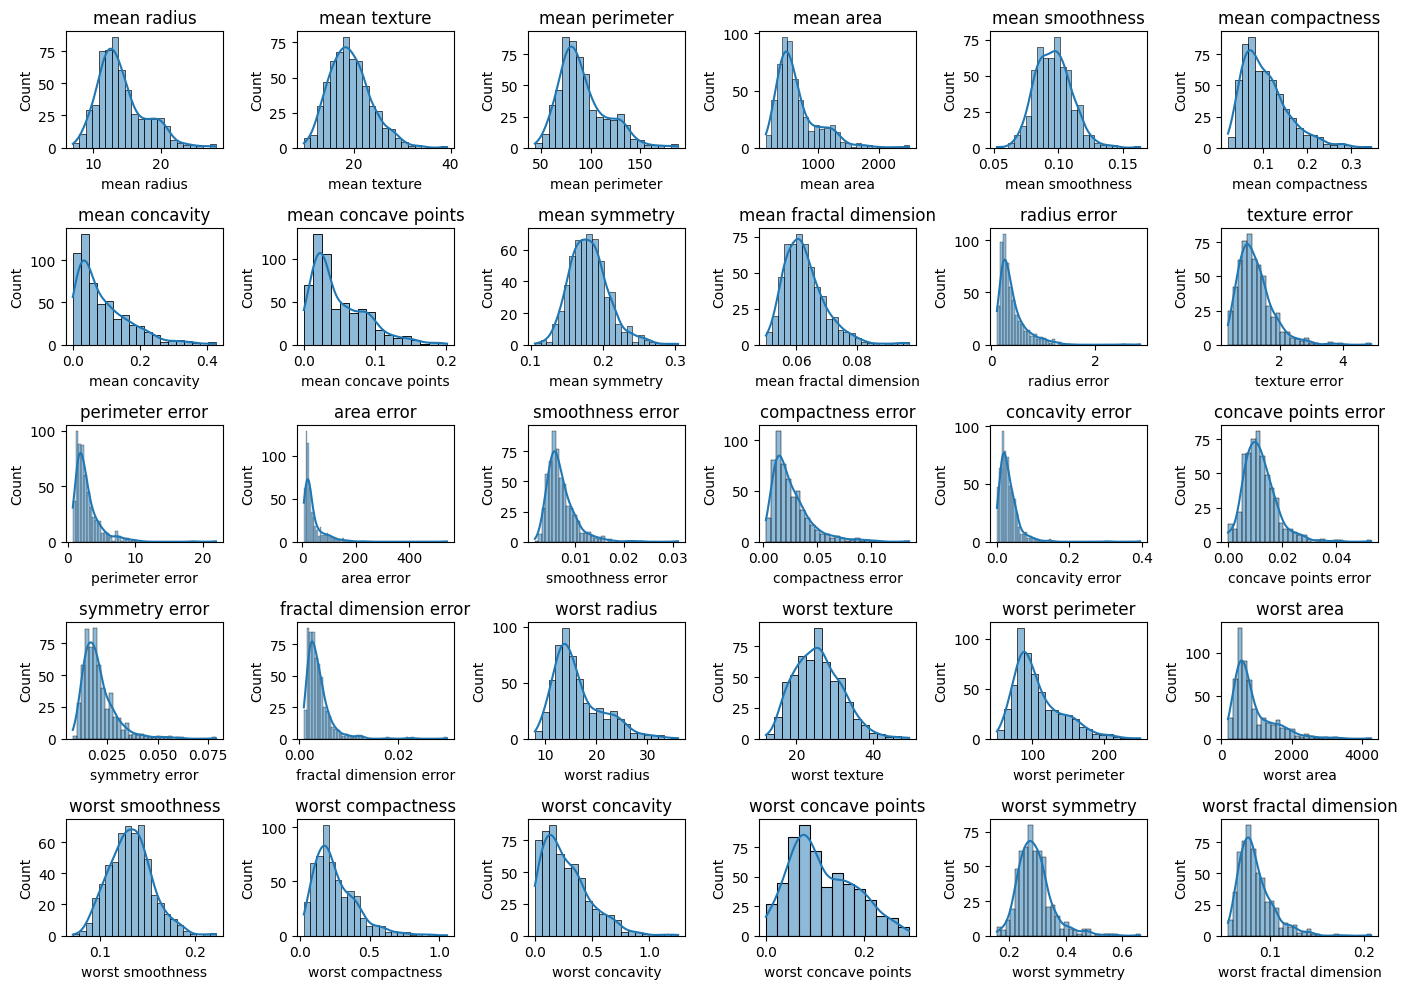

In [20]:
# Check the distribution of features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(5, 6, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

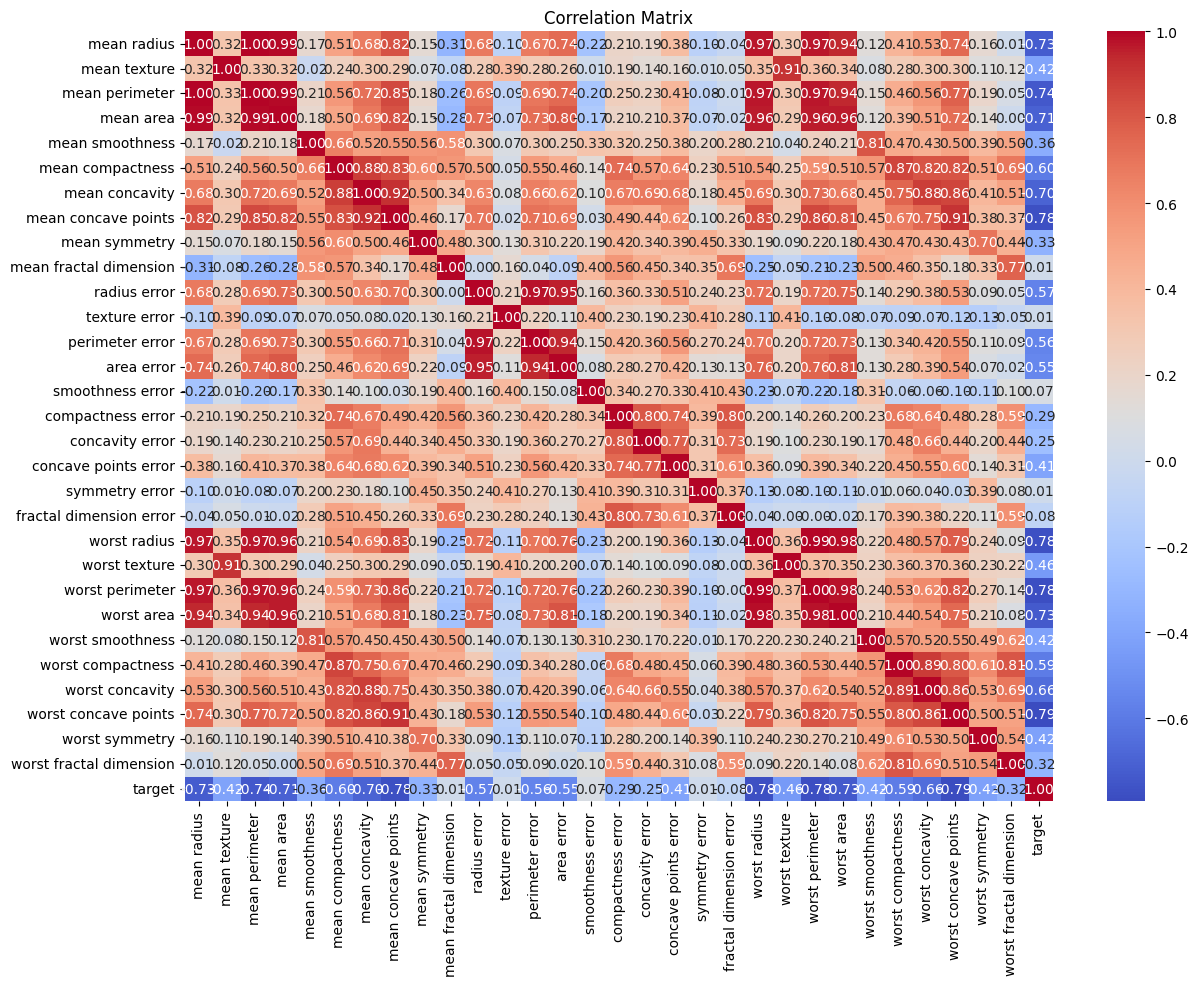

In [22]:
# Analyze correlations between features and target variable
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/tmp/ipykernel_83126/771133787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette="muted")
/tmp/ipykernel_83126/771133787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette="muted")
/tmp/ipykernel_83126/771133787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette="muted")
/tmp/ipykernel_83126/771133787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

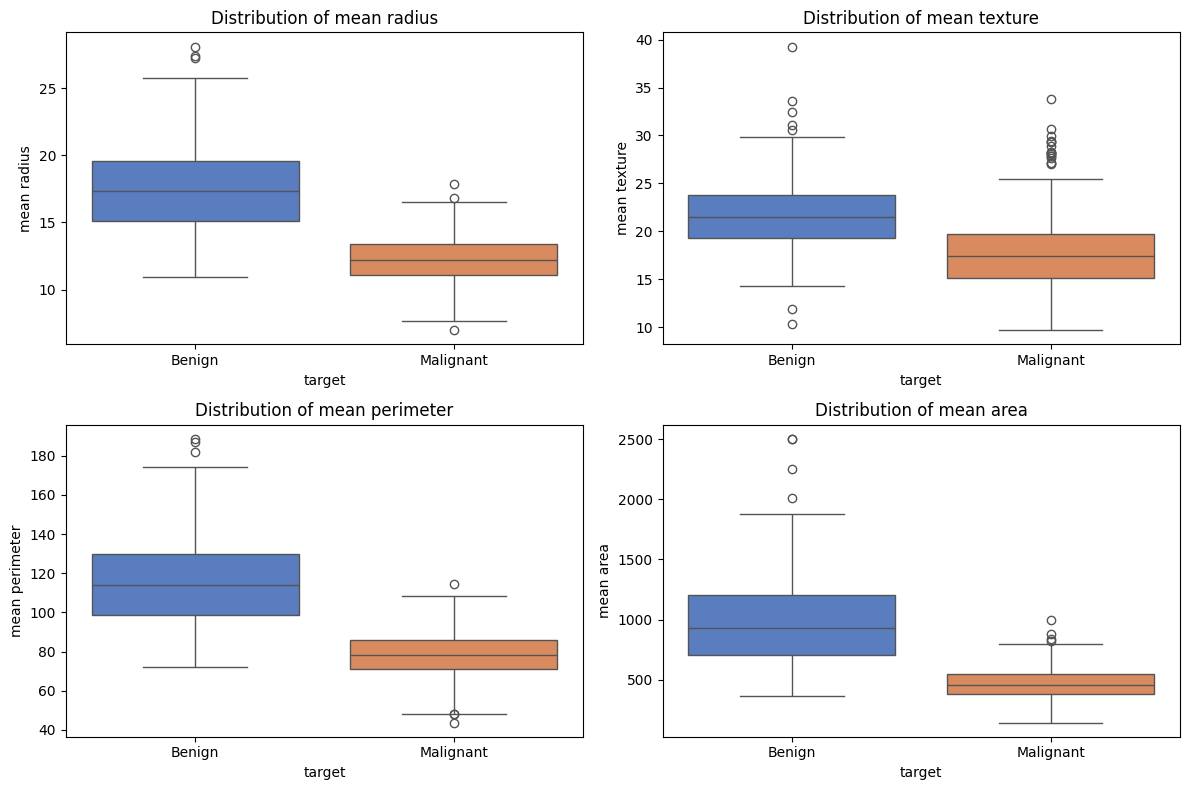

In [49]:
# 2.3 Boxplot of key features grouped by the target variable
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette="muted")
    plt.title(f"Distribution of {feature}")
    plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.tight_layout()
plt.show()

In [27]:
# Step 3: Feature Engineering

# 3.1 Create a new feature: Mean Compactness Ratio
df['compactness_ratio'] = df['mean compactness'] / (df['mean area'] + 1e-5)

In [29]:
# 3.2 Normalize the dataset for better scale

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)

In [31]:
# 3.3 Add PCA for dimensionality reduction (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

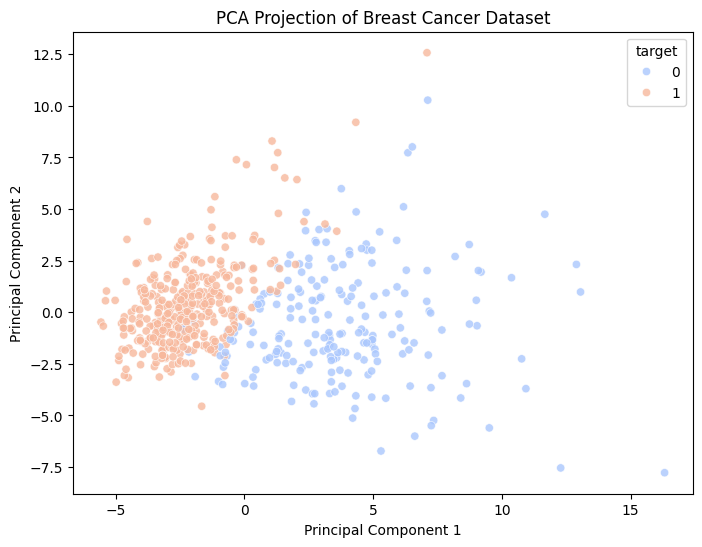

In [32]:
# Visualizing PCA features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca["PCA1"], y=X_pca["PCA2"], hue=y, palette="coolwarm", alpha=0.8)
plt.title("PCA Projection of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
# Step 2: Model Selection (Random Forest and SVM)
# Define the models and hyperparameters for GridSearchCV
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


In [38]:
# Hyperparameter grids
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"]
    }
}


In [39]:
# Step 3: Grid Search for Each Model
best_models = {}
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")



Tuning hyperparameters for RandomForest...
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

Tuning hyperparameters for SVM...
Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}


In [40]:

# Step 4: Model Training and Evaluation
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))



Evaluating RandomForest...

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score for RandomForest: 0.956140350877193
Confusion Matrix for RandomForest:
 [[39  3]
 [ 2 70]]

Evaluating SVM...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score for SVM: 0.9824561403508771
Confusion Matrix for SVM:
 [[41  1]
 [ 1 71]]


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 2: Define Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [42]:
# Step 3: Train and Evaluate Each Classifier
results = {}
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.9825
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Logistic Regression Confusion Matrix:
[[41  1]
 [ 1 71]]

Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9825
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Support Vector Machine Confusion Matrix:
[[41  1]
 [ 1

In [43]:
# Step 4: Find the Best Model
best_model = max(results, key=results.get)
print("\nBest Classifier:")
print(f"{best_model} with Accuracy: {results[best_model]:.4f}")


Best Classifier:
Logistic Regression with Accuracy: 0.9825


In [44]:
# Step 1: Reduce the dataset to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [45]:
# Step 2: Re-train classifiers with 2D data
for name, clf in classifiers.items():
    print(f"\nTraining {name} on 2D data...")
    clf.fit(X_train_2D, y_train)


Training Logistic Regression on 2D data...

Training Support Vector Machine on 2D data...

Training K-Nearest Neighbors on 2D data...

Training Decision Tree on 2D data...

Training Random Forest on 2D data...

Training Gradient Boosting on 2D data...


In [46]:
# Step 3: Create a mesh grid for plotting
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

In [47]:
# Step 4: Predict on the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/tmp/ipykernel_83126/3835993600.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=30, edgecolor="k", cmap=plt.cm.coolwarm, marker="x")


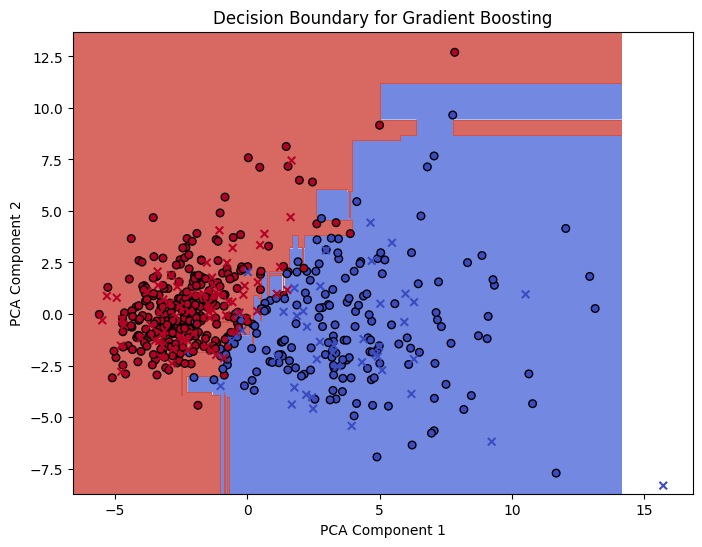

In [48]:
 # Step 5: Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, s=30, edgecolor="k", cmap=plt.cm.coolwarm)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=30, edgecolor="k", cmap=plt.cm.coolwarm, marker="x")
plt.title(f"Decision Boundary for {name}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()